<h1>Preprocessing data</h1>

<h2>1️. Installing and importing required libraries</h2>

In [5]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

<h2>2. Analizing the dataset</h2>

<h3> Stock market prices: Yahoo Finance</h3>

In [5]:
def fetch_stock_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)
    return data

In [6]:
stock_market_data = fetch_stock_data('AAPL', '2012-01-01', '2025-01-01')
stock_market_data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.375393,12.413612,12.308285,12.320322,302220800
2012-01-04,12.441896,12.479213,12.316707,12.338375,260022000
2012-01-05,12.580021,12.595669,12.418719,12.487333,271269600
2012-01-06,12.711537,12.722070,12.615840,12.632391,318292800
2012-01-09,12.691372,12.872535,12.679936,12.804825,394024400
...,...,...,...,...,...
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100


In [7]:
print(stock_market_data.isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [8]:
print(stock_market_data.columns) 
print(len(stock_market_data.columns)) 

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
5


In [9]:
# we will flatten the multi-index columns
stock_market_data.columns = ['_'.join(col).strip() for col in stock_market_data.columns]

if "Date" in stock_market_data.index.names:
    stock_market_data.reset_index(inplace=True)

stock_market_data.columns = ['Date', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL']

print(stock_market_data.head())

        Date  Close_AAPL  High_AAPL   Low_AAPL  Open_AAPL  Volume_AAPL
0 2012-01-03   12.375393  12.413612  12.308285  12.320322    302220800
1 2012-01-04   12.441896  12.479213  12.316707  12.338375    260022000
2 2012-01-05   12.580021  12.595669  12.418719  12.487333    271269600
3 2012-01-06   12.711537  12.722070  12.615840  12.632391    318292800
4 2012-01-09   12.691372  12.872535  12.679936  12.804825    394024400


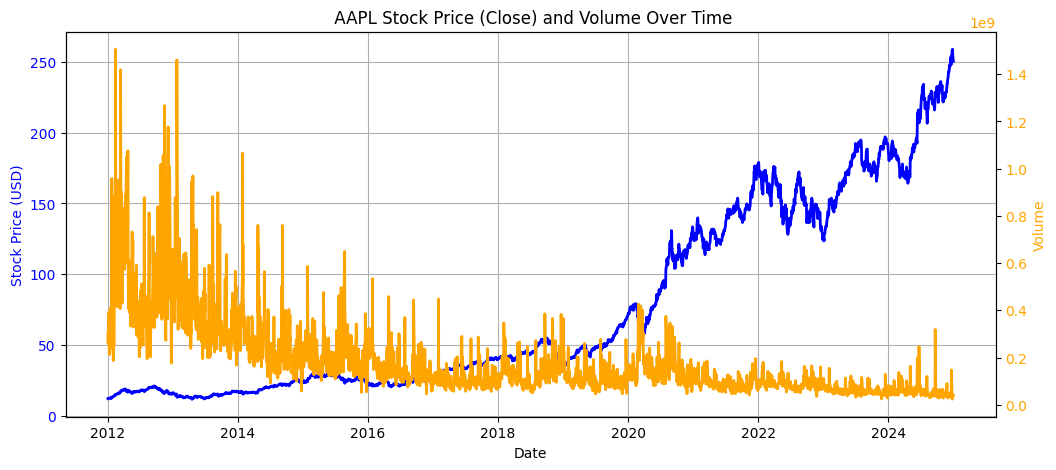

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(stock_market_data['Date'], stock_market_data["Close_AAPL"], color="blue", label="Close Price", linewidth=2)
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(stock_market_data['Date'], stock_market_data["Volume_AAPL"], color="orange", label="Volume", linewidth=2)
ax2.set_ylabel("Volume", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

plt.title(f" AAPL Stock Price (Close) and Volume Over Time")
ax1.grid()

plt.show()

In [11]:
stock_market_data = stock_market_data.dropna()
print(stock_market_data.isnull().sum())

Date           0
Close_AAPL     0
High_AAPL      0
Low_AAPL       0
Open_AAPL      0
Volume_AAPL    0
dtype: int64


In [12]:
stock_market_data['Price_Movement_AAPL'] = (stock_market_data['Close_AAPL'] > stock_market_data['Open_AAPL']).astype(int)

In [21]:
stock_market_data['RSI_Close_AAPL'] = ta.rsi(stock_market_data[('Close_AAPL')], length=90)

macd = ta.macd(stock_market_data['Close_AAPL'])
stock_market_data['MACD_Line_Close_AAPL'] = macd['MACD_12_26_9']  
stock_market_data['MACD_Signal_Close_AAPL'] = macd['MACDs_12_26_9'] 
stock_market_data['MACD_Histogram_Close_AAPL'] = macd['MACDh_12_26_9']  

bollinger = ta.bbands(stock_market_data['Close_AAPL'], length=90)
stock_market_data['Bollinger_Upper_Close_AAPL'] = bollinger['BBU_90_2.0']  
stock_market_data['Bollinger_Lower_Close_AAPL'] = bollinger['BBL_90_2.0']  
stock_market_data['Bollinger_Mid_Close_AAPL'] = bollinger['BBM_90_2.0']

stock_market_data = stock_market_data.dropna()
stock_market_data

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Price_Movement_AAPL,RSI_Close_AAPL,MACD_Line_Close_AAPL,MACD_Signal_Close_AAPL,MACD_Histogram_Close_AAPL,Bollinger_Upper_Close_AAPL,Bollinger_Lower_Close_AAPL,Bollinger_Mid_Close_AAPL
90,2012-05-11,17.054338,17.287865,16.983318,17.002878,399546000,1,57.613180,-0.194641,-0.100267,-0.094374,20.290343,11.873847,16.082095
91,2012-05-14,16.798847,17.078416,16.780190,16.929755,352626400,0,56.519159,-0.224144,-0.125043,-0.099101,20.269814,11.991197,16.130506
92,2012-05-15,16.646873,16.949314,16.604140,16.896049,476336000,0,55.880877,-0.256828,-0.151400,-0.105428,20.247215,12.104170,16.175693
93,2012-05-16,16.433510,16.758822,16.281838,16.673356,560896000,0,54.999065,-0.296528,-0.180425,-0.116103,20.222052,12.212044,16.217048
94,2012-05-17,15.953218,16.476244,15.953218,16.410339,717220000,0,53.091939,-0.362568,-0.216854,-0.145714,20.188445,12.318137,16.253291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,1,60.322223,6.067327,5.390177,0.677150,249.694750,211.962378,230.828564
3266,2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,1,60.495279,6.300019,5.572145,0.727874,250.914110,211.483941,231.199026
3267,2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300,0,59.399379,6.137217,5.685159,0.452057,251.844509,211.204580,231.524545
3268,2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500,0,58.343049,5.669595,5.682047,-0.012451,252.541785,211.085532,231.813658


<h3> Best practice: saving the dataset</h3>

In [22]:
stock_market_data.to_csv('aapl_data.csv', index=True)